In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set

#import data
tv_campaigns_df = pd.read_csv('tv_campaigns.csv', parse_dates=['date'])
# tv_campaigns_df['campaign'] = tv_campaigns_df['campaign'].replace('tv campaign', 1)

user_signup_df = pd.read_csv('user_signup_data.csv', parse_dates=['signup_date'])

In [2]:
#merge the two datasets on signup date
merged = pd.merge(user_signup_df, tv_campaigns_df, left_on='signup_date', 
                  right_on='date', how='left')
merged['campaign'] = merged['campaign'].fillna('no campaign')
merged = merged.drop('date', axis=1)
merged = merged.sort_values(by='signup_date')
merged.head()

,userid,cpc,organic,affiliate,social,signup_date,campaign
4224,bfbe9b98-618e-43c0-8352-47d2ffea8cc7,1,0,0,1,2017-01-01,tv campaign
3785,9f210f70-f351-4575-8707-63b6d5048d32,1,0,0,0,2017-01-01,tv campaign
4128,5cfb8559-80f1-48be-bd25-97541c2c63b7,0,0,1,1,2017-01-01,tv campaign
4862,9c86672e-abbb-4528-9423-825c4a17665f,0,0,1,0,2017-01-01,tv campaign
2960,545b8248-98fd-43e2-91bb-4fc4dbbfd14d,1,0,0,1,2017-01-01,tv campaign


In [3]:
# checking for duplicated userids - no repeats
merged.duplicated(subset='userid').sum()

0

In [4]:
#checking if any customers signed up on tv_campaign days without interaction with any other marketing channels - none
merged.loc[(merged.cpc == 0) & (merged.organic == 0) & (merged.affiliate == 0) & (merged.social ==0)]

,userid,cpc,organic,affiliate,social,signup_date,campaign


### Task 1: Give an overview of our channels and how they contribute to user acquisition.

Assumptions:

- The user touchpoints were all generated on the day of sign up

In [20]:
tv_campaign_df = merged.loc[merged['campaign'] == 'tv campaign']
no_campaign_df = merged.loc[merged['campaign'] == 'no campaign']

# count user signups in each channel on active and inactive spending dates
tv_campaign_df = pd.melt(tv_campaign_df[['cpc','organic','affiliate','social']], var_name='channel', value_name="tv_campaign").groupby(['channel']).sum().reset_index()
no_campaign_df = pd.melt(no_campaign_df[['cpc','organic','affiliate','social']], var_name='channel', value_name="no_campaign").groupby(['channel']).sum().reset_index()

# merge new tables of active and inactive tv dates and create total column for plotting
all_df = pd.merge(tv_campaign_df, no_campaign_df, how='left', on='channel')
all_df['total'] = all_df[['tv_campaign','no_campaign']].sum(axis=1)
all_df['%tv_campaign'] = (100 * all_df['tv_campaign']/all_df['total']).round(1)
all_df['%no_campaign'] = (100 * all_df['no_campaign']/all_df['total']).round(1)
all_df

,channel,tv_campaign,no_campaign,total,%tv_campaign,%no_campaign
0,affiliate,421,3476,3897,10.8,89.2
1,cpc,191,1467,1658,11.5,88.5
2,organic,59,460,519,11.4,88.6
3,social,323,2662,2985,10.8,89.2


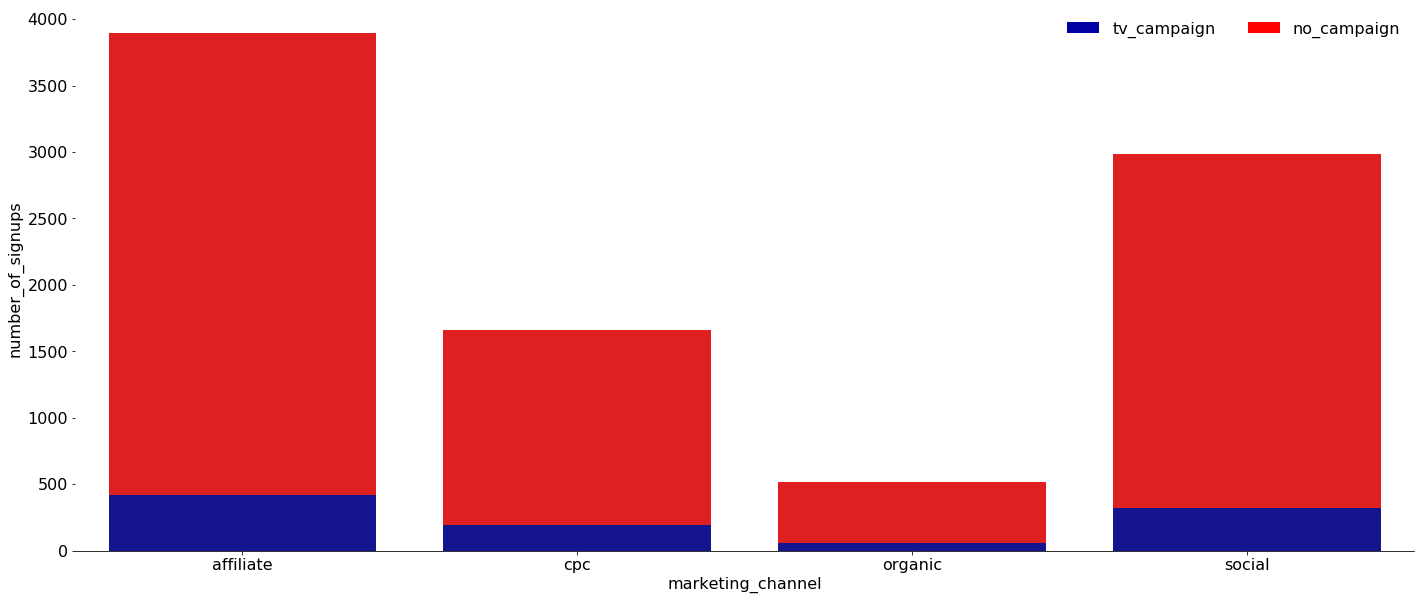

In [15]:
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" series - this will be background and show the no_campaign part of total
sns.barplot(x = all_df['channel'], y = all_df['total'], color = "red")

#Plot 2 - overlay - "tv_campaign" series
bottom_plot = sns.barplot(x = all_df['channel'], y = all_df['tv_campaign'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['tv_campaign', 'no_campaign'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("number_of_signups")
bottom_plot.set_xlabel("marketing_channel")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

### Task 2. Estimate the impact of doubling TV spending
3. Make appropriate assumptions for the channel touchpoint cost. With your assumptions

In [50]:
signups_by_day_df = merged.groupby(['signup_date', 'campaign']).agg({'cpc':'sum', 'affiliate':'sum', 'organic':'sum', 'social':'sum','userid':'count'})
signups_by_day_df

,,cpc,affiliate,organic,social,userid
signup_date,campaign,,,,,
2017-01-01,tv campaign,24,45,10,36,67
2017-01-02,no campaign,17,46,3,31,56
2017-01-03,no campaign,11,37,6,26,47
2017-01-04,no campaign,20,39,5,33,54
2017-01-05,no campaign,14,36,6,30,50
2017-01-06,no campaign,19,48,5,25,57
2017-01-07,no campaign,15,43,8,30,54
2017-01-08,no campaign,24,42,7,35,60
2017-01-09,no campaign,17,47,5,33,59


In [59]:
ax = sns.stripplot(x='signup_date', y='cpc', data=signups_by_day_df, hue='campaign')

ValueError: Could not interpret input 'signup_date'